# Homework 4

## FINM 35700 - Spring 2024

### UChicago Financial Mathematics

### Due Date: 2025-04-22

* Alex Popovici
* alex.popovici@uchicago.edu

This homework relies on:

Interest Rate & Credit Default Swaps
- the SOFR OIS symbology file `sofr_swap_symbology`,
- the SOFR swaps market data file `sofr_swaps_market_data_eod`,
- the CDS spreads market data file `cds_market_data_eod`.

HYG ETF corporate bonds:
- the HYG bond symbology file `hyg_bond_symbology` and
- the HYG basket composition file (containing bond weights and yields) `hyg_basket_composition`.

In [2]:
# import tools from previous homeworks
from credit_market_tools import *

# Use static calculation/valuation date of 2024-12-13, matching data available in the market prices EOD file
calc_date = ql.Date(13, 12, 2024)
ql.Settings.instance().evaluationDate = calc_date

# Calculation/valuation date as pd datetime
as_of_date = pd.to_datetime('2024-12-13')

-----------------------------------------------------------
# Problem 1: Fixed rate bond prices and sensitivities (bond yield model)

## When computing sensitivities, assume "everything else being equal" (ceteris paribus).

For a better understanding of dependencies, you can use the simple fixed rate bond valuation formula in the flat yield model (formula [6] in Lecture 1).

\begin{align}
PV_{Bond}\left(c,T,y_{sa} \right)=1+\frac{c-y_{sa}}{y_{sa}}\cdot\left[1-\left(1+\frac{y_{sa}}{2}\right)^{-2T}\right]
\end{align}


## a. True or False (fixed rate bond prices)

1. Fixed rate bond price is increasing in yield.
    - False - the opposite is the case, sinc the DV01 is positive!
2. Fixed rate bond price is increasing in coupon
    - True.
3. Fixed rate bond price is increasing in bond maturity
    - False - this is only the case when $c-y_{sa} > 0$
4. Fixed rate callable bond prices are higher or equal to their "bullet" (non-callable) version.
    - False - the call optionality is on the side of the issuer, not on the side of the investor!

## b. True or False (fixed rate bond yields)

1. Fixed rate bond yield is increasing in interest rate (assuming credit spread unchanged)
    - True, assuming all else equal (assuming credit spread unchanged).
2. Fixed rate bond yield is increasing in credit spread (assuming interest rate unchanged)
    - True, assuming all else equal (interest rate unchanged).
3. Fixed rate bond yield is increasing in coupon
    - False: coupon and yield are independent parameters of the model
4. Fixed rate bond yield is increasing in bond maturity (assume term structure of yield curve is known)
    - False, it depends on the slope of the yield curve. For inverted yield curves, bond yield is decreasing in bond maturity.

## c. True or False (fixed rate bond durations)

1. Fixed rate bond duration is increasing with yield
    - False, the opposite is the case.
2. Fixed rate bond duration is increasing in coupon
    - False, the opposite is the case.
3. Fixed rate bond duration is increasing with bond maturity
    - True, since duration is a weighted sum of cashflow time-to-maturies.
4. Fixed rate callable bond durations are higher or equal to their "bullet" (non-callable) version.
    - False, the opposite is the case, since the "workout date" for callable bonds is lower or equal to the maturity date.


## d. True or False (fixed rate bond convexities)

1. Fixed rate bond convexity is increasing with yield
    - False, the opposite is the case.
2. Fixed rate bond convexity is increasing in coupon
    - False, the opposite is the case.
3. Fixed rate bond convexity is increasing with bond maturity
    - True, since convexity is a weighted sum of cashflow time-to-maturies squared.
4. Fixed rate callable bond convexities are higher or equal to their "bullet" (non-callable) version.
    - False, the opposite is the case.


-----------------------------------------------------------
# Problem 2: US SOFR swap curve calibration as of 2024-12-13
### Follow Section "1. SOFR OIS swap rates and SOFR discount curve calibration + validation" in the QuantLib Advanced notebook !

## a. Load and explore US SOFR swaps symbology and market data

Load the `sofr_swap_symbology` Excel file into a dataframe. Print all swap tenors available.

Load the `sofr_swaps_market_data_eod` Excel file into a dataframe. Print all dates available.

Plot the historial time series of SOFR rates for the available [1Y, 2Y, 3Y, 5Y, 7Y, 10Y, 20Y, 30Y] tenors.

,ticker,class,bbg,name,tenor,type,dcc,exchange,country,currency,status
figi,,,,,,,,,,,
BBG00KFWPJJ9,USOSFR1,Curncy,USOSFR1 Curncy,USD OIS ANN VS SOFR 1Y,1,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPJX3,USOSFR2,Curncy,USOSFR2 Curncy,USD OIS ANN VS SOFR 2Y,2,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPK15,USOSFR3,Curncy,USOSFR3 Curncy,USD OIS ANN VS SOFR 3Y,3,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPK51,USOSFR5,Curncy,USOSFR5 Curncy,USD OIS ANN VS SOFR 5Y,5,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPK79,USOSFR7,Curncy,USOSFR7 Curncy,USD OIS ANN VS SOFR 7Y,7,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPKB4,USOSFR10,Curncy,USOSFR10 Curncy,USD OIS ANN VS SOFR 10Y,10,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPKF0,USOSFR20,Curncy,USOSFR20 Curncy,USD OIS ANN VS SOFR 20Y,20,SWAP,ACT/360,NONE,US,USD,ACTV
BBG00KFWPKH8,USOSFR30,Curncy,USOSFR30 Curncy,USD OIS ANN VS SOFR 30Y,30,SWAP,ACT/360,NONE,US,USD,ACTV


,date,figi,bidRate,askRate,midRate
1874,2024-12-13,BBG00KFWPK51,3.9133,3.9181,3.9157
1875,2024-12-13,BBG00KFWPK79,3.8937,3.8991,3.8964
1876,2024-12-13,BBG00KFWPKB4,3.9015,3.9065,3.9040
1877,2024-12-13,BBG00KFWPKH8,3.7602,3.7662,3.7632
1878,2024-12-13,BBG00KFWPKF0,3.9246,3.9304,3.9275


Text(0.5, 0, 'Date')

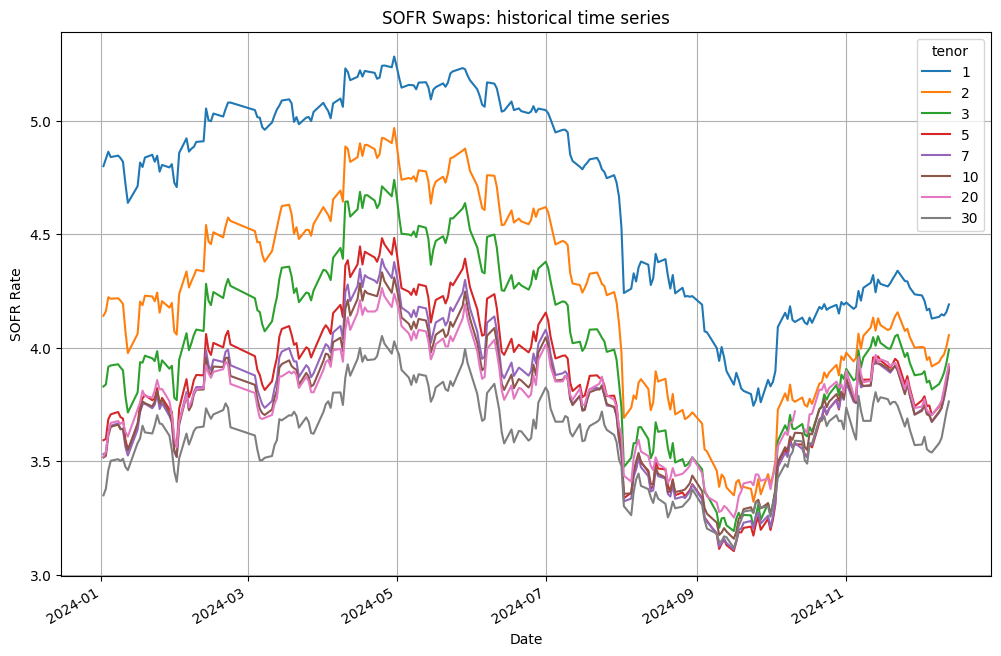

In [3]:
# sofr_symbology
sofr_symbology = pd.read_excel('./data/sofr_swaps_symbology.xlsx')
sofr_symbology.set_index('figi',inplace=True)
display(sofr_symbology)

# sofr_market_quotes
sofr_market_quotes = pd.read_excel('./data/sofr_swaps_market_data_eod.xlsx')
display(sofr_market_quotes.tail())

# pivot to get SOFR rates time series
sofr_quotes_ts = sofr_market_quotes.pivot(index="date", columns="figi", values="midRate")
sofr_quotes_ts.columns = sofr_symbology.tenor[sofr_quotes_ts.columns]
# print(sofr_quotes_ts.head())

plt = sofr_quotes_ts.plot(grid=True, style='-', title='SOFR Swaps: historical time series', figsize=(12,8))
plt.set_ylabel('SOFR Rate')
plt.set_xlabel('Date')

## b. Calibrate the US SOFR yield curve (via bootstrapping)
The function below shows how to calibrate a smooth yield/discount factor curve from SOFR swaps. 

Prepare a joint symbology & market dataframe quotes as of 2024-12-13. 

Calibrate the SOFR discount factor curve as of 2024-12-13.

Follow section 1b in the QuantLib Advanced notebook.

In [4]:
def calibrate_sofr_curve_from_frame(
        calc_date: ql.Date,
        sofr_details: pd.DataFrame,
        rate_quote_column: str):
    '''Create a calibrated yield curve from a SOFR details dataframe which includes rate quotes.
    '''
    ql.Settings.instance().evaluationDate = calc_date

    # Sort dataframe by maturity
    sorted_details_frame = sofr_details.sort_values(by='tenor')    
    
    # settle_days
    settle_days = 1
    
    # For US SOFR OIS Swaps 
    day_count = ql.Actual360()

    # For US SOFR Swaps     
    calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
    
    sofr_helpers = []
    
    for index, row in sorted_details_frame.iterrows():
        sofr_quote = row[rate_quote_column]
        tenor_in_years = row['tenor']
        sofr_tenor = ql.Period(tenor_in_years, ql.Years)
        
        # create sofr_rate_helper
        sofr_helper = ql.OISRateHelper(settle_days, sofr_tenor, ql.QuoteHandle(ql.SimpleQuote(sofr_quote/100)), ql.Sofr())
                        
        sofr_helpers.append(sofr_helper)
        
    sofr_yield_curve = ql.PiecewiseLinearZero(settle_days, calendar, sofr_helpers, day_count)
    sofr_yield_curve.enableExtrapolation()
    
    return sofr_yield_curve

In [5]:
# sofr_combined
sofr_combined = sofr_symbology.merge(sofr_market_quotes[sofr_market_quotes['date'] == '2024-12-13'], how='left', on=['figi'])
display(sofr_combined)

# calibrate SOFR discount curve
sofr_yield_curve = calibrate_sofr_curve_from_frame(calc_date, sofr_combined, 'midRate')
sofr_yield_curve_handle = ql.YieldTermStructureHandle(sofr_yield_curve)


,figi,ticker,class,bbg,name,tenor,type,dcc,exchange,country,currency,status,date,bidRate,askRate,midRate
0,BBG00KFWPJJ9,USOSFR1,Curncy,USOSFR1 Curncy,USD OIS ANN VS SOFR 1Y,1,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,4.1858,4.1958,4.19080
1,BBG00KFWPJX3,USOSFR2,Curncy,USOSFR2 Curncy,USD OIS ANN VS SOFR 2Y,2,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,4.0524,4.0585,4.05545
2,BBG00KFWPK15,USOSFR3,Curncy,USOSFR3 Curncy,USD OIS ANN VS SOFR 3Y,3,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,3.9883,3.9944,3.99135
3,BBG00KFWPK51,USOSFR5,Curncy,USOSFR5 Curncy,USD OIS ANN VS SOFR 5Y,5,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,3.9133,3.9181,3.91570
4,BBG00KFWPK79,USOSFR7,Curncy,USOSFR7 Curncy,USD OIS ANN VS SOFR 7Y,7,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,3.8937,3.8991,3.89640
5,BBG00KFWPKB4,USOSFR10,Curncy,USOSFR10 Curncy,USD OIS ANN VS SOFR 10Y,10,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,3.9015,3.9065,3.90400
6,BBG00KFWPKF0,USOSFR20,Curncy,USOSFR20 Curncy,USD OIS ANN VS SOFR 20Y,20,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,3.9246,3.9304,3.92750
7,BBG00KFWPKH8,USOSFR30,Curncy,USOSFR30 Curncy,USD OIS ANN VS SOFR 30Y,30,SWAP,ACT/360,NONE,US,USD,ACTV,2024-12-13,3.7602,3.7662,3.76320


## c. Display the calibrated SOFR discount curve dataframe

Follow section 1d (in the QuantLib Advanced notebook) to display the calibration details dataframe.

In [6]:
# Display and plot SOFR yield curve
grid_dates = [sofr_yield_curve.referenceDate() + ql.Period(y, ql.Years) for y in list(range(0,30,1))]


sofr_yield_curve_simple_df = get_yield_curve_details_df(sofr_yield_curve)                  # using calibration grid
sofr_yield_curve_details_df = get_yield_curve_details_df(sofr_yield_curve, grid_dates)    # using external grid

display(sofr_yield_curve_simple_df)
display(sofr_yield_curve_details_df)

,Date,YearFrac,DiscountFactor,ZeroRate
0,2024-12-16,0.000,1.000,4.190
1,2025-12-16,1.014,0.959,4.190
2,2026-12-16,2.028,0.923,4.052
3,2027-12-16,3.042,0.888,3.986
4,2029-12-17,5.075,0.823,3.907
5,2031-12-16,7.100,0.763,3.888
6,2034-12-18,10.150,0.678,3.899
7,2044-12-16,20.292,0.457,3.931
8,2054-12-16,30.436,0.333,3.676


,Date,YearFrac,DiscountFactor,ZeroRate
0,2024-12-16,0.000,1.000,4.190
1,2025-12-16,1.014,0.959,4.190
2,2026-12-16,2.028,0.923,4.052
3,2027-12-16,3.042,0.888,3.986
4,2028-12-16,4.058,0.855,3.946
5,2029-12-16,5.072,0.823,3.907
6,2030-12-16,6.086,0.792,3.897
7,2031-12-16,7.100,0.763,3.888
8,2032-12-16,8.117,0.734,3.892
9,2033-12-16,9.131,0.705,3.895


## d. Plot the calibrated US SOFR Zero Interest Rates and Discount Factor curves

Plot the SOFR zero rates and discount factor curves by maturity. Follow section 1c in the QuantLib Advanced notebook.

Text(0.5, 0, 'Date')

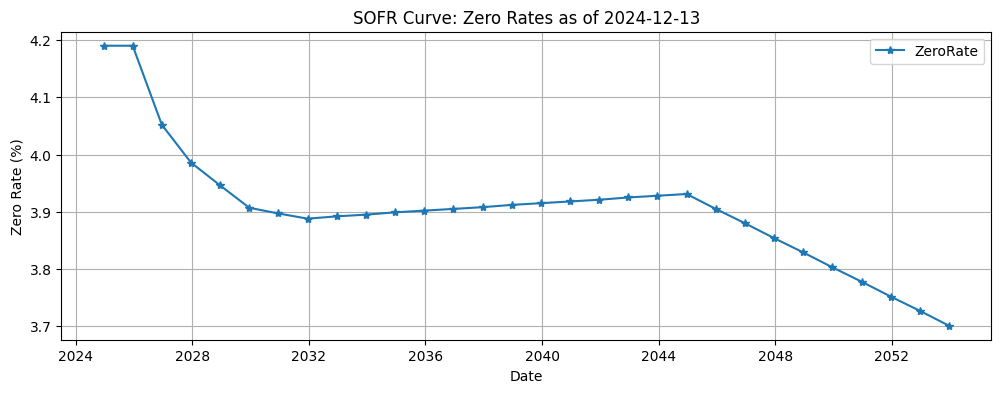

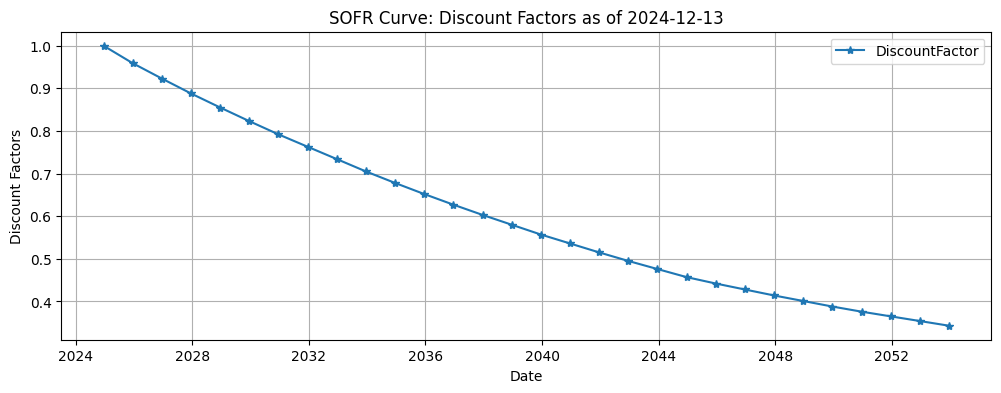

In [7]:
# Plot the SOFR yield curve
plt = sofr_yield_curve_details_df.plot(x='Date', y='ZeroRate', grid=True, style='*-', title=f'SOFR Curve: Zero Rates as of {calc_date.to_date()}', figsize=(12,4))
plt.set_ylabel('Zero Rate (%)')
plt.set_xlabel('Date')

plt = sofr_yield_curve_details_df.plot(x='Date', y='DiscountFactor', grid=True, style='*-', title=f'SOFR Curve: Discount Factors as of {calc_date.to_date()}', figsize=(12,4))
plt.set_ylabel('Discount Factors')
plt.set_xlabel('Date')

-----------------------------------------------------------
# Problem 3: CDS Hazard Rate calibration and valuation
## Follow Section "2. CDS Hazard Rate calibration + Pricing" in the QuantLib Advanced notebook !!!

## a. Load and explore the CDS market data (IBM credit issuer)

Load the `cds_market_data_eod` Excel file into a dataframe. 

Plot the historical time series of CDS Par Spreads for the available tenors.


        date ticker                short_name    tier      sector  region  \
0 2024-01-02    IBM  Intl Business Machs Corp  SNRFOR  Technology  N.Amer   
1 2024-01-03    IBM  Intl Business Machs Corp  SNRFOR  Technology  N.Amer   
2 2024-01-04    IBM  Intl Business Machs Corp  SNRFOR  Technology  N.Amer   
3 2024-01-05    IBM  Intl Business Machs Corp  SNRFOR  Technology  N.Amer   
4 2024-01-08    IBM  Intl Business Machs Corp  SNRFOR  Technology  N.Amer   

  currency doc_clause  running_coupon  cds_assumed_recovery  par_spread_1y  \
0      USD       XR14            0.01                   0.4        13.6831   
1      USD       XR14            0.01                   0.4        14.2256   
2      USD       XR14            0.01                   0.4        13.8318   
3      USD       XR14            0.01                   0.4        13.6181   
4      USD       XR14            0.01                   0.4        13.4433   

   par_spread_2y  par_spread_3y  par_spread_5y  par_spread_7y  par_s

Text(0.5, 0, 'Date')

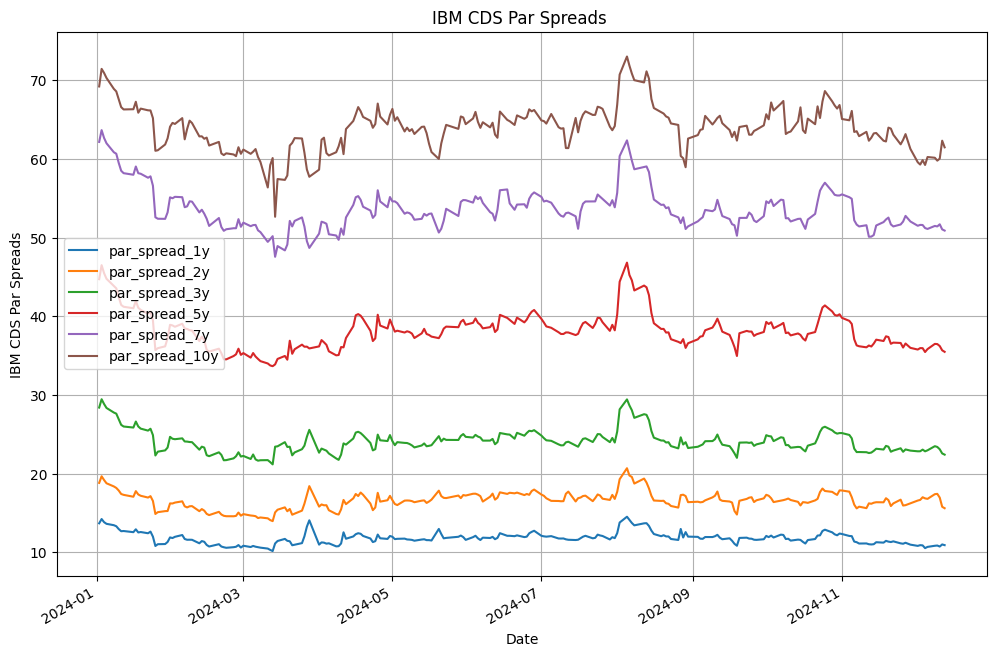

In [8]:
# cds_market_quotes
cds_market_quotes = pd.read_excel('./data/cds_market_data_eod.xlsx')
print(cds_market_quotes.head())

# Create par spreads (bps) dataframe
par_spread_col_names = [f'par_spread_{n}y' for n in [1,2,3,5,7,10]]
cds_par_spreads_df = cds_market_quotes.set_index('date')[par_spread_col_names]

plt = cds_par_spreads_df.plot(grid=True, style='-', title='IBM CDS Par Spreads ', figsize=(12,8))
plt.set_ylabel('IBM CDS Par Spreads')
plt.set_xlabel('Date')


## b. Calibrate the IBM hazard rate curve as of 2024-12-13

Follow section 2a in the QuantLib Advanced notebook. Use the calibrated SOFR discount curve from Problem 2b.

In [9]:
def calibrate_cds_hazard_rate_curve(calc_date, sofr_yield_curve_handle, cds_par_spreads_bps, cds_recovery_rate = 0.4):
    '''Calibrate hazard rate curve from CDS Par Spreads'''
    CDS_settle_days = 1

    CDS_day_count = ql.Actual360()

    # CDS standard tenors: 1Y, 2Y, 3Y, 5Y 7Y and 10Y
    CDS_tenors = [ql.Period(y, ql.Years) for y in [1, 2, 3, 5, 7, 10]]
              

    CDS_helpers = [ql.SpreadCdsHelper((cds_par_spread / 10000.0), CDS_tenor, CDS_settle_days, ql.TARGET(),
                                  ql.Quarterly, ql.Following, ql.DateGeneration.TwentiethIMM, CDS_day_count, cds_recovery_rate, sofr_yield_curve_handle)
               
    for (cds_par_spread, CDS_tenor) in zip(cds_par_spreads_bps, CDS_tenors)]

    # bootstrap hazard_rate_curve
    hazard_rate_curve = ql.PiecewiseFlatHazardRate(calc_date, CDS_helpers, CDS_day_count)
    hazard_rate_curve.enableExtrapolation()

    return(hazard_rate_curve)


def get_hazard_rates_df(hazard_rate_curve):
    '''Return dataframe with calibrated hazard rates and survival probabilities'''
    
    CDS_day_count = ql.Actual360()
    
    hazard_list = [(hr[0].to_date(), 
                CDS_day_count.yearFraction(calc_date, hr[0]),
                hr[1] * 1e4,
                hazard_rate_curve.survivalProbability(hr[0])) for hr in hazard_rate_curve.nodes()]

    grid_dates, year_frac, hazard_rates, surv_probs = zip(*hazard_list)

    hazard_rates_df = pd.DataFrame(data={'Date': grid_dates, 
                                     'YearFrac': year_frac,
                                     'HazardRateBps': hazard_rates,                                     
                                     'SurvivalProb': surv_probs})
    return(hazard_rates_df)


In [10]:
# CDS spreads for IBM as of calc_date = 2024-12-13
cds_par_spreads = list(cds_par_spreads_df.loc['2024-12-13'])
print(cds_par_spreads)

# cds_recovery_rate
cds_recovery_rate = 0.4

# hazard_rate_curve
hazard_rate_curve = calibrate_cds_hazard_rate_curve(calc_date, sofr_yield_curve_handle, cds_par_spreads, cds_recovery_rate)

# hazard_rates_df
hazard_rates_df = get_hazard_rates_df(hazard_rate_curve)

print(hazard_rates_df)


[10.9082, 15.6009, 22.4095, 35.4733, 50.8816, 61.462]
         Date   YearFrac  HazardRateBps  SurvivalProb
0  2024-12-13   0.000000      17.986159      1.000000
1  2025-12-22   1.038889      17.986159      0.998133
2  2026-12-21   2.050000      34.181041      0.994690
3  2027-12-20   3.061111      61.483969      0.988525
4  2029-12-20   5.091667      95.337696      0.969572
5  2031-12-22   7.125000     160.439595      0.938453
6  2034-12-20  10.163889     155.160213      0.895230


## c. Plot the calibrated Hazard Rates and Survival Probability curves
Follow section 2b in the QuantLib Advanced notebook. Use the calibrated SOFR discount curve from Problem 2b.

Text(0.5, 0, 'Date')

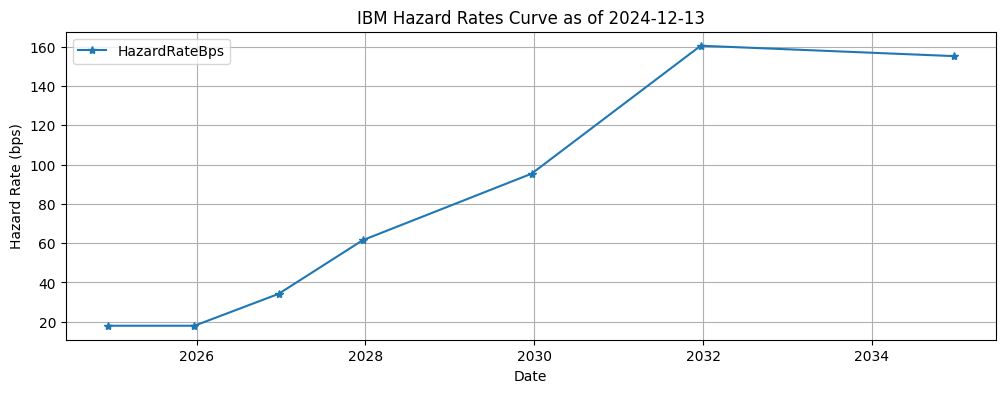

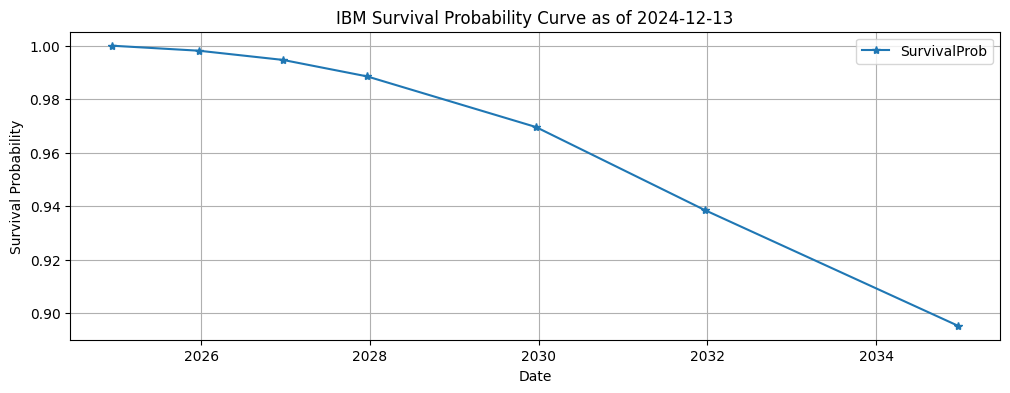

In [11]:
plt = hazard_rates_df.plot(x='Date', y='HazardRateBps', grid=True, style='*-', title=f'IBM Hazard Rates Curve as of {calc_date.to_date()}', figsize=(12,4))
plt.set_ylabel('Hazard Rate (bps)')
plt.set_xlabel('Date')

plt = hazard_rates_df.plot(x='Date', y='SurvivalProb', grid=True, style='*-', title=f'IBM Survival Probability Curve as of {calc_date.to_date()}', figsize=(12,4))
plt.set_ylabel('Survival Probability')
plt.set_xlabel('Date')


## d. Compute the fair/par spread and PV of a 5 year CDS contract

Follow section 2c in the QuantLib Advanced notebook. Construct a CDS object with 100 bps coupon and 2029-06-20 maturity. Compute the fair/par spread and PV.


In [12]:
# CDS specs
side = ql.Protection.Seller

face_notional = 100

contractual_spread = 100 / 10000

cds_start_date = calc_date
cds_maturity_date = ql.Date(20, 6, 2029)

# Create CDS schedule
cds_schedule = ql.MakeSchedule(cds_start_date, cds_maturity_date, ql.Period('3M'),
                            ql.Quarterly, ql.TARGET(), ql.Following, ql.Unadjusted, ql.DateGeneration.TwentiethIMM)

# Create CDS object
cds_obj = ql.CreditDefaultSwap(side, face_notional, contractual_spread, cds_schedule, ql.Following, ql.Actual360())

# Create CDS pricing engine
default_prob_curve_handle = ql.DefaultProbabilityTermStructureHandle(hazard_rate_curve)
cds_engine = ql.MidPointCdsEngine(default_prob_curve_handle, cds_recovery_rate, sofr_yield_curve_handle)
cds_obj.setPricingEngine(cds_engine)


# Print CDS valuation results
print('CDS protection start date:', cds_obj.protectionStartDate())
print('CDS fair/par spread:', round(cds_obj.fairSpread()*10000, 3))
print('CDS PV:', round(cds_obj.NPV(), 4))    
print('CDS Premium Leg PV:', round(cds_obj.couponLegNPV(), 4))
print('CDS Default Leg PV', round(cds_obj.defaultLegNPV(), 4))
print('Survival Prob. to Maturity:', round(hazard_rate_curve.survivalProbability(cds_maturity_date), 4))


CDS protection start date: December 13th, 2024
CDS fair/par spread: 33.238
CDS PV: 2.7634
CDS Premium Leg PV: 4.1391
CDS Default Leg PV -1.3758
Survival Prob. to Maturity: 0.9743


-----------------------------------------------------------
# Problem 4: Credit ETF analysis on HYG (iShares High Yield Corporate Bond ETF)

## a. Load and explore the HYG basket composition and market data

Load the `hyg_basket_composition` Excel file into a dataframe. It contains the HYG basket constituent face notionals, weights and yields-to-maturities as of 2024-12-13.

Load the `hyg_corp_symbology` Excel file into a dataframe. It contains the corporate bond details for HYG constituents.

How many corporate bonds are in the HYG basket?  What are the average and median face notionals for a bond?

How many unique tickers are in the HYG basket? What are the average and median face notionals for a ticker?

Compute mean, median and standard deviation of yields-to-maturity of bonds in the basket.

In [36]:
# hyg_corp_symbology
hyg_corp_symbology = pd.read_excel('data/hyg_corp_symbology.xlsx')

# Load HYG basket composition file, keep only columns needed for pricing
hyg_basket_composition = pd.read_excel('data/hyg_basket_composition.xlsx')
hyg_basket_composition = hyg_basket_composition[['isin', 'midYield', 'face_notional', 'face_notional_weight']]

# hyg_df
hyg_df = hyg_corp_symbology.merge(hyg_basket_composition, how='inner', on=['isin'])
# print(hyg_df.head())

print('Corporate bonds in HYG basket:', hyg_df.shape[0])

print('Average and median face notionals for bonds in HYG basket:')
print(hyg_df['face_notional'].describe()[['mean', '50%']])

print('Number of unique tickers in HYG basket:', len(hyg_df['ticker'].unique()))

print('Average and median face notionals by ticker:')
hyg_by_ticker = hyg_df[['ticker', 'face_notional']].groupby(['ticker']).sum()
print(hyg_by_ticker['face_notional'].describe()[['mean', '50%']])

print('Mean, median and standard deviation of yields (pct):')
print(hyg_df['midYield'].describe()[['mean', '50%', 'std']])



Corporate bonds in HYG basket: 1193
Average and median face notionals for bonds in HYG basket:
mean    1.319556e+07
50%     1.126700e+07
Name: face_notional, dtype: float64
Number of unique tickers in HYG basket: 415
Average and median face notionals by ticker:
mean    3.793327e+07
50%     2.660600e+07
Name: face_notional, dtype: float64
Mean, median and standard deviation of yields (pct):
mean    7.375438
50%     6.139500
std     6.981988
Name: midYield, dtype: float64


## b. Compute the NAV of the HYG basket and the intrinsic price of one ETF share.

Create the bond objects for all constituents of HYG. Compute the dirty price for each bond (from yield-to-maturity).

Aggregate the ETF NAV value (intrisic value of bond basket) as the weighted sum of dirty prices times basket weights. Keep in mind that the resulting ETF NAV will be on a face of $100, since the basket face notional weights add up to 100 percent.

Compute the intrinisc market capitalization of the HYG ETF by scaling the ETF NAV price to the ETF total face notional. 

Divide by 195,600,000 (the number of ETF shared outstanding as of 2024-12-13) to obtain the intrinsic USD price of one HYG ETF share.

As a reference, the market price of each HYG share on 2024-12-13 was $79.41, and the NAV was $79.45.

In [37]:
# face notionals and weights
bond_face_notionals = hyg_df['face_notional']
bond_face_notional_weights = hyg_df['face_notional_weight']

# bond objects and dirty prices
hyg_bond_objects = []
hyg_bond_dirty_prices = []

# ETF intrinsic  NAV and Market Cap
hyg_intrinsic_nav = 0
hyg_intrinsic_market_cap = 0

# loop over bonds
for i, df_row in hyg_df.iterrows():
    # bond_object
    bond_object = create_bond_from_symbology(df_row.to_dict())
    
    # bond_dirty_price                
    bond_yield = df_row['midYield'] / 100
    bond_dirty_price = bond_object.dirtyPrice(bond_yield, ql.Thirty360(ql.Thirty360.USA), ql.Compounded, ql.Semiannual)
    
    # hyg_basket_nav    
    hyg_intrinsic_nav += bond_dirty_price * bond_face_notional_weights[i] / 100
    
    # hyg_basket_market_cap    
    hyg_intrinsic_market_cap += bond_dirty_price * bond_face_notionals[i] / 100
    
    # Populate lists
    hyg_bond_objects.append(bond_object)
    hyg_bond_dirty_prices.append(bond_dirty_price)


# Add dirty prices to hyg_df
hyg_df['dirty_price'] = hyg_bond_dirty_prices
display(hyg_df[['security', 'midYield', 'face_notional', 'dirty_price']].head())

,security,midYield,face_notional,dirty_price
0,AA 5 1/2 12/15/27,5.3990,7642000,100.291154
1,AA 6 1/8 05/15/28,5.5965,5158000,102.143280
2,AA 4 1/8 03/31/29,5.5675,7331000,95.427106
3,AA 7 1/8 03/15/31,5.9425,11567000,107.884694
4,AAL 7 1/4 02/15/28,5.8940,12743000,106.287625


In [43]:
# Aggregate the ETF NAV value (intrisic value of bond basket) as the weighted sum of dirty prices times basket weights.
print('hyg_intrinsic_nav (on a face of $100):', round(hyg_intrinsic_nav, 2))

# Compute the intrinisc market capitalization of the HYG ETF by scaling the ETF NAV price to the ETF total face notional. 
print('hyg_intrinsic_market_cap (in $BN):', round(hyg_intrinsic_market_cap/1e9, 2))

# Divide by 195,600,000 (the number of ETF shared outstanding as of 2024-12-13) to obtain the intrinsic price of one HYG ETF share.
hyg_number_of_outstanding_etf_shares = 195600000
hyg_intrinsic_price_per_etf_share = hyg_intrinsic_market_cap / hyg_number_of_outstanding_etf_shares
print('hyg_intrinsic_price_per_etf_share (in $):', round(hyg_intrinsic_price_per_etf_share, 2))


hyg_intrinsic_nav (on a face of $100): 100.03
hyg_intrinsic_market_cap (in $BN): 15.54
hyg_intrinsic_price_per_etf_share (in $): 79.45


## c. Compute the ETF yield using the ACF (Aggregated Cash-Flows) method

Create the bond objects for all constituents of HYG. 

Write a function that computes the ETF NAV for a given flat yield y.

Use a numerical root finder (e.g. root_scalar from scipy.optimize) to solve for 

- ETF_NAV(yield) = ETF_NAV_Price 

and obtain the ETF yield.

As a reference, the HYG market yield as of 2024-12-13 was around 7%.

In [39]:
def calc_etf_nav_from_yield(etf_yield, hyg_bond_objects, bond_face_notional_weights):
    
    # etf_intrinsic_nav
    etf_intrinsic_nav = 0
    
    # loop over bonds
    for i in range(len(hyg_bond_objects)):
        bond_object = hyg_bond_objects[i]
        # calc bond_dirty_price
        bond_dirty_price = bond_object.dirtyPrice(etf_yield, ql.Thirty360(ql.Thirty360.USA), ql.Compounded, ql.Semiannual)        
        
        # update etf_intrinsic_nav
        etf_intrinsic_nav += bond_dirty_price * bond_face_notional_weights[i] / 100
        
    return(etf_intrinsic_nav)
    

Add a root finder wrapper function (e.g. root_scalar in scipy.optimize ) and solve for the ETF yield.

In [40]:
from scipy.optimize import root_scalar

# etf_nav_from_yield_wrapper
etf_nav_from_yield_wrapper = lambda y: hyg_intrinsic_nav - calc_etf_nav_from_yield(y, hyg_bond_objects, bond_face_notional_weights)

# use 1-dimensional root finder
root_finder_yield_sol = root_scalar(etf_nav_from_yield_wrapper, bracket=[0.001, 0.50], method='brentq', xtol=1e-6)
etf_nav_yield = root_finder_yield_sol.root
print('HYG etf_nav_yield (pct):', round(etf_nav_yield * 100, 3))

# root_scalar() convergence details
print(root_finder_yield_sol)



HYG etf_nav_yield (pct): 7.039
      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.07038877443204865
         method: brentq


## d. Compute the ETF DV01 and Duration

Treat the ETF basket as a synthetic bond.

Use - 1 bp scenarios in ETF yield space to compute the ETF DV01 and Duration.

As a reference, the HYG risk metrics as of 2024-12-13 are: DV01 of 3.82, Duration of 3.82.

In [50]:
# Use example from Section 6. "Market Data Scenarios" in the QuantLib basic notebook.

# compute - 1bp ETF yield scenario
hyg_intrinsic_nav_yield_1bp_down = calc_etf_nav_from_yield(etf_nav_yield - 0.0001, hyg_bond_objects, bond_face_notional_weights)

print("hyg_intrinsic_nav: ", round(hyg_intrinsic_nav, 3))
print("hyg_intrinsic_nav_yield_1bp_down: ", round(hyg_intrinsic_nav_yield_1bp_down, 3))

# Compute scenario delta/gamma sensitivities
dv01 = round((hyg_intrinsic_nav_yield_1bp_down - hyg_intrinsic_nav) * 1e4 / 100, 4)
duration = round(dv01 / hyg_intrinsic_nav * 100, 4)

print("ETF DV01: ", dv01)
print("ETF Duration: ", duration)


hyg_intrinsic_nav:  100.032
hyg_intrinsic_nav_yield_1bp_down:  100.07
ETF DV01:  3.8184
ETF Duration:  3.8172
